In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) # Quoting 3 ignora as aspas
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [4]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


# nltk.download('stopwords') # Stopwords são palavras muito comuns em um idioma, como "o", "a", "e", "de", "para" em português, ou "the", "and", "is", "in" em inglês.
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review = ' '.join(review) # Converte a lista em uma string ['love', 'movie', 'great', 'story'] "love movie great story"
    corpus.append(review)

In [5]:
# Importando a classe CountVectorizer da biblioteca sklearn para converter texto em uma representação numérica
from sklearn.feature_extraction.text import CountVectorizer

# Criando uma instância do CountVectorizer, configurando para considerar apenas as 1500 palavras mais frequentes
cv = CountVectorizer(max_features = 1000)

# Aplicando o CountVectorizer no corpus (um conjunto de documentos de texto).
# O método fit_transform cria a matriz de contagem de palavras (X) e a converte para um array denso (toarray)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [6]:
len(X[0])

1000

In [7]:
np.unique(y, return_counts=True) # verificar quantidade de valores y

(array([0, 1], dtype=int64), array([500, 500], dtype=int64))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.svm import SVC
# Cria uma instância do classificador SVC com um kernel radial (rbf) e um estado aleatório fixo para reprodutibilidade
classifier = SVC(kernel="rbf", random_state=0)

# Ajusta o modelo aos dados de treino (X_train e y_train)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

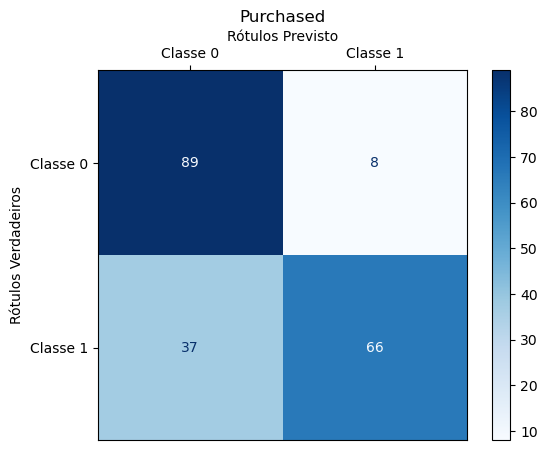

Acurácia: 77.50%


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Classe 0', 'Classe 1']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Purchased")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")